In [1]:
import platform, sys, os, shutil
import packaging.version as pv
import time

try:
    from google.colab import files
    from google.colab import drive
    drive.mount('/content/drive/')
    print('Google Colab environment detected. Mounted Google Drive.')
except ImportError:
    print('This is not Google Colab.')
    
python_version=platform.python_version()
print('Python version:', python_version)

if pv.parse(python_version) < pv.parse("3.0.0"): 
    print("Python3 is needed!")
    print("How to fix: Runtime/Change_runtime_type/Python 3")
    sys.exit()

try:
    from dolfin import *
    from dolfin import __version__ as dolfin_version
    import mshr
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import __version__ as mpl_version
    import pandas as pd
    from tqdm import tqdm
    import scipy.optimize as opt
    from scipy.stats import norm as sp_norm
    from scipy.integrate import quad
    from scipy.integrate import simpson
    from scipy.signal import find_peaks
    from scipy import __version__ as sp_version
    import mpmath
    import openturns as ot
    from sklearn.neighbors import KernelDensity
    from sklearn.metrics import mean_squared_error
    from tabulate import tabulate
    import plotly.graph_objs as go
    import plotly.io as pio
    from datetime import datetime
except ImportError as e:
    !wget  "https://fem-on-colab.github.io/releases/fenics-install-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    from dolfin import *
    from dolfin import __version__ as dolfin_version
    import mshr
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import __version__ as mpl_version
    import pandas as pd
    from tqdm import tqdm
    import scipy.optimize as opt
    from scipy.stats import norm as sp_norm
    from scipy.integrate import quad
    from scipy.integrate import simpson
    from scipy.signal import find_peaks
    from scipy import __version__ as sp_version
    import mpmath
    !pip install openturns
    import openturns as ot
    !pip install scikit-learn
    from sklearn.neighbors import KernelDensity
    from sklearn.metrics import mean_squared_error
    from tabulate import tabulate
    !pip install plotly
    !pip install kaleido
    import plotly.graph_objs as go
    import plotly.io as pio
    from datetime import datetime

try:
  import gmsh
except ImportError:
  !wget "https://fem-on-colab.github.io/releases/gmsh-install.sh" -O "/tmp/gmsh-install.sh" && bash "/tmp/gmsh-install.sh"
  import gmsh
    
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('axes', labelsize=15) 
plt.rc('lines', linewidth=3)

from IPython.display import clear_output, display

import warnings
warnings.filterwarnings("ignore")

ot.Log.Show(ot.Log.NONE)

set_log_level(30)

parameters['allow_extrapolation'] = True
parameters["form_compiler"]["cpp_optimize"] = True
parameters["form_compiler"]["optimize"] = True
parameters["form_compiler"]["quadrature_degree"] = 3
parameters['form_compiler']['representation'] = 'uflacs'
parameters['linear_algebra_backend'] = "PETSc"

print('numpy version:', np.__version__)
print('scipy version:', sp_version)
print('matplotlib version:', mpl_version)
print('dolfin version:', dolfin_version)
print('gmsh version:', gmsh.__version__)
print('mpmath version:', mpmath.__version__)

if os.path.exists('ILT.py'):
    %run ILT.py
    %run Functions_NMR.py
    %run FEM_NMR.py
    %run SemiA_Sphere_NMR.py
    %run Conv_NMR.py
    %run ilt_t2.py
    print('ILT.py load succesfully')
    print('ilt_t2.py load succesfully')
    print('Functions_NMR.py load succesfully')
    print('FEM_NMR.py load succesfully')
    print('SemiA_Sphere_NMR.py load succesfully')
    print('Conv_NMR.py load succesfully')
else:
    !wget 'https://github.com/smoralesc91/NMR_FEM/blob/a9c20559c96fac02a94993ecca9f4193b23c9c48/Codes/ILT.py'
    !wget 'https://github.com/smoralesc91/NMR_FEM/blob/a9c20559c96fac02a94993ecca9f4193b23c9c48/Codes/Functions_NMR.py'
    !wget 'https://github.com/smoralesc91/NMR_FEM/blob/a9c20559c96fac02a94993ecca9f4193b23c9c48/Codes/FEM_NMR.py'
    !wget 'https://github.com/smoralesc91/NMR_FEM/blob/a9c20559c96fac02a94993ecca9f4193b23c9c48/Codes/SemiA_Sphere_NMR.py'
    !wget 'https://github.com/smoralesc91/NMR_FEM/blob/a9c20559c96fac02a94993ecca9f4193b23c9c48/Codes/Conv_NMR.py'
    %run ILT.py
    %run Functions_NMR.py
    %run FEM_NMR.py
    %run SemiA_Sphere_NMR.py
    %run Conv_NMR.py
    print('ILT.py download and load succesfully')
    print('Functions_NMR.py download and load succesfully')
    print('FEM_NMR.py download and load succesfully')
    print('SemiA_Sphere_NMR.py download and load succesfully')
    print('Conv_NMR.py download and load succesfully')

This is not Google Colab.
Python version: 3.10.12
numpy version: 1.26.4
scipy version: 1.12.0
matplotlib version: 3.5.1
dolfin version: 2019.2.0.13.dev0
gmsh version: 4.11.1
mpmath version: 1.2.1
ILT.py load succesfully
ilt_t2.py load succesfully
Functions_NMR.py load succesfully
FEM_NMR.py load succesfully
SemiA_Sphere_NMR.py load succesfully
Conv_NMR.py load succesfully


# PSD

In [2]:
def normal1(r, params):
    mu, sigma = params
    return sp_norm.pdf(r, mu, sigma)

def normal2(r, params):
    mu, sigma = params
    return sp_norm.pdf(r, mu, sigma)

def distribution(r, params1, params2, a):
    return a * normal1(r, params1) + (1. - a) * normal2(r, params2)

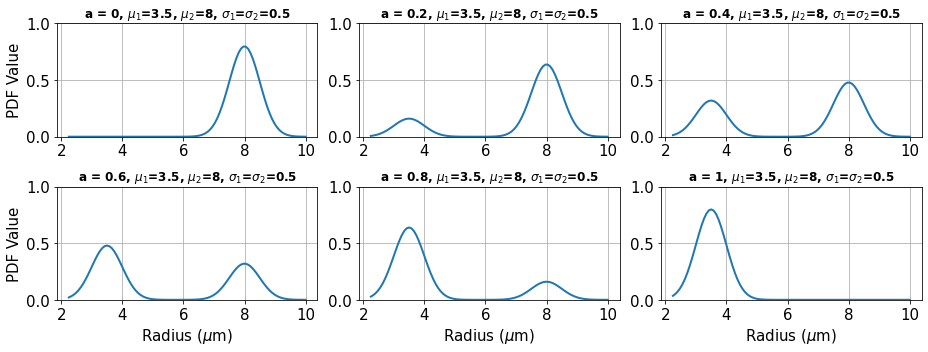

In [12]:
r_min, r_max = 2.25, 10.
params1 = (3.5, 0.5)
params2 = (8, 0.5)
a_values = [0, 0.2, 0.4, 0.6, 0.8, 1]

r = np.linspace(r_min, r_max, 100)

fig, axs = plt.subplots(2, 3, figsize=(13, 5))

for i in range(2):
    for j in range(3):
        idx = i * 3 + j
        if idx < len(a_values):
            a = a_values[idx]
            bimodal_distribution = distribution(r, params1, params2, a)

            axs[i, j].plot(r, bimodal_distribution, marker='', linestyle='solid', linewidth=2)
            axs[i, j].grid()
            if i == 1:
                axs[i, j].set_xlabel('Radius ($\mu$m)')
            if j == 0:
                axs[i, j].set_ylabel('PDF Value')
            axs[i, j].set_title(f'a = {a}, $\mu_1$={params1[0]}, $\mu_2$={params2[0]}, $\sigma_1$=$\sigma_2$={params1[1]}', fontweight='bold')
            axs[i, j].set_ylim(0, 1.)

plt.tight_layout()

#plt.savefig('PSD_synthetic_2p25-10um_3p5um-0p5_8um-0p5.png')
plt.show()

Distribution integral: 0.9999683287581669


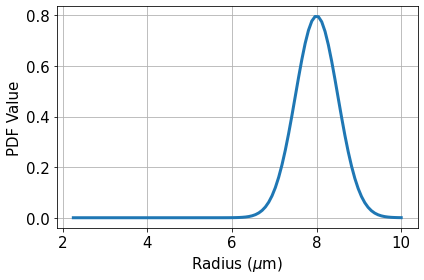

In [166]:
r_min, r_max = 2.25, 10.
params1 = (3.5, 0.5)
params2 = (8, 0.5)
a = 0.

r = np.linspace(r_min, r_max, 100)
bimodal_distribution = distribution(r, params1, params2, a)

def bimodal_pdf(r):
    return distribution(r, params1, params2, a)

integral, _ = quad(bimodal_pdf, r_min, r_max)

print(f"Distribution integral: {integral}")

np.savetxt(f'results/radii_dist_2p25to10um_mu3p5_8um_sigma0p5um_a{a}.txt', r)
np.savetxt(f'results/pdf_dist_2p25to10um_mu3p5_8um_sigma0p5um_a{a}.txt', bimodal_distribution)

r = np.loadtxt(f'results/radii_dist_2p25to10um_mu3p5_8um_sigma0p5um_a{a}.txt')
bimodal_distribution = np.loadtxt(f'results/pdf_dist_2p25to10um_mu3p5_8um_sigma0p5um_a{a}.txt')

plt.plot(r, bimodal_distribution, marker='', linestyle='solid' )
plt.grid()
plt.xlabel('Radius ($\mu$m)')
plt.ylabel('PDF Value')

plt.show()

In [177]:
%%time

# Parameters
surface_relaxivity = 30.e-6
diffusion_water = 2.3e-9
T2bulk = 1
B0=0.05
temperature=303.15
fluid='water'

t0 = 0; tf = 10; dt=0.002
nt = int((tf-t0)/dt) + 1
time_array_dist = np.linspace(t0, tf, nt)

CPU times: user 252 µs, sys: 11 µs, total: 263 µs
Wall time: 252 µs


## Testing New Codes (Conv, SemiA, FEM)

In [178]:
%%time

signal_total_c = np.zeros(nt)
signal_radius_c = []

for radius, prob in zip(r*1.e-6, bimodal_distribution):
    signal = prob * NMR_Conventional(radius=radius, aspect_ratio = 1,  
                                     T2B=T2bulk, diffusion=diffusion_water, rho=surface_relaxivity, 
                                     B_0=B0, Temp=temperature, fluid=fluid,
                                     t_0=t0, t_f=tf, dt=dt,
                                     volume_=False , return_data = 'mag_amounts')
    signal_radius_c.append(signal)
    signal_total_c += signal

CPU times: user 57.5 ms, sys: 61 µs, total: 57.6 ms
Wall time: 61.5 ms


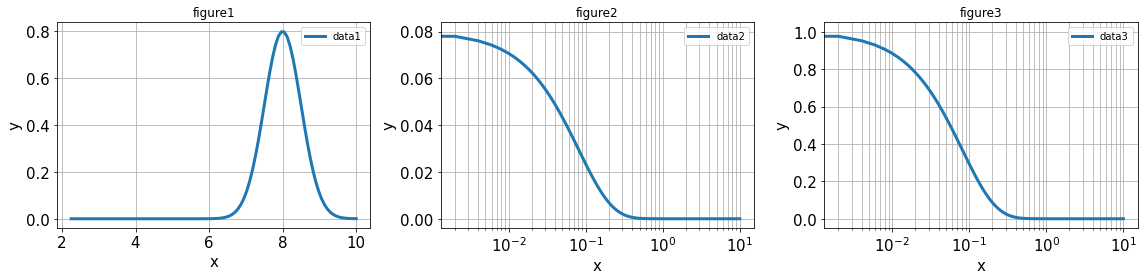

In [179]:
plot_triple_graphs(xdata1=r, ydata1=bimodal_distribution,
                   xdata2=time_array_dist, ydata2=signal_total_c, xscale2='log',
                   xdata3=time_array_dist, ydata3=normalize_results(signal_total_c), xscale3='log',
                   figsize=(16, 4),)

In [156]:
%%time

signal_total_a = np.zeros(nt)
signal_radius_a = []

for radius, prob in zip(r*1.e-6, bimodal_distribution):
    signal = prob * NMR_SemiA_sphere(radius=radius, 
                                     T2B=T2bulk, diffusion=diffusion_water, rho=surface_relaxivity, 
                                     B_0=B0, Temp=temperature, fluid=fluid,
                                     n_terms=30,
                                     t_0=t0, t_f=tf, dt=dt, print_time=False,
                                     volume_=False , return_data = 'mag_amounts')
    signal_radius_a.append(signal)
    signal_total_a += signal

CPU times: user 2min 15s, sys: 130 ms, total: 2min 15s
Wall time: 2min 17s


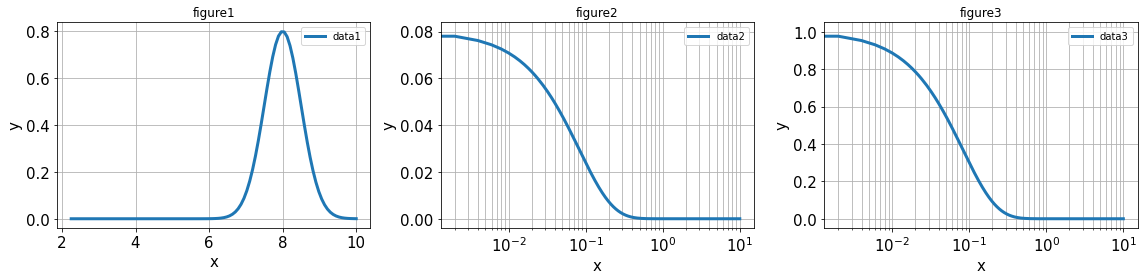

In [157]:
plot_triple_graphs(xdata1=r, ydata1=bimodal_distribution,
                   xdata2=time_array_dist, ydata2=signal_total_a, xscale2='log',
                   xdata3=time_array_dist, ydata3=normalize_results(signal_total_a), xscale3='log',
                   figsize=(16, 4),)

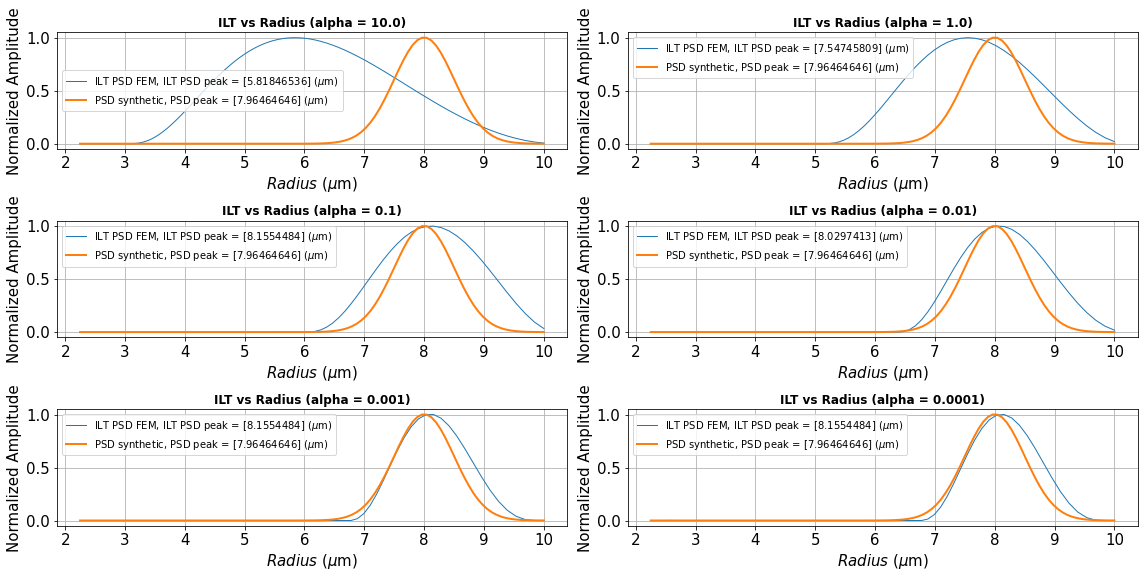

In [159]:
%matplotlib inline
alpha_values = np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4])

z_values = []
fz_values = []

fig, axs = plt.subplots(3, 2, figsize=(16, 8))

for i in range(3):
    for j in range(2):
        idx = i * 2 + j
        if idx < len(alpha_values):
            alpha = alpha_values[idx]
            r0, rf = np.min(r1)*1.e-6, np.max(r1)*1.e-6
            z0, zf = calculate_z0_zf(T2bulk=T2bulk, surface_relaxivity=surface_relaxivity, r0=r0, rf=rf)
            z, fz, _, _, _ = ilt(time_array_dist, normalize_results(signal_total_a), (zf, z0), 100, alpha)
            z_values.append(z)
            fz_values.append(fz)

            phi, radii_ = calculate_phi_radii(T2bulk=T2bulk, surface_relaxivity=surface_relaxivity, z=z, fz=fz, m0=mag_sat(B0, temperature, fluid))

            ilt_peak = maxT2_ilt(radii_*1.e6, phi)[1]
            psd_peak = maxT2_ilt(r1, pdf1)[1]

            axs[i, j].plot(radii_*1.e6, normalize_results(phi), label=f'ILT PSD FEM, ILT PSD peak = {ilt_peak} ($\mu$m)', linewidth=1)
            axs[i, j].plot(r1, normalize_results(pdf1), label=f'PSD synthetic, PSD peak = {psd_peak} ($\mu$m)', linewidth=2)
            
            axs[i, j].set_xscale('linear')
            axs[i, j].grid(True, which='both')
            axs[i, j].legend()
            axs[i, j].set_title(f'ILT vs Radius (alpha = {alpha})', fontweight='bold')
            axs[i, j].set_xlabel('$Radius$ ($\mu$m)')
            axs[i, j].set_ylabel('Normalized Amplitude')

plt.tight_layout()
#plt.savefig('ilt_semia_psd_a0_rho30_d2p3_t2b0p5_tf10_dt0p001.png')
plt.show()

In [64]:
%%time

signal_total_f = np.zeros(nt)
signal_radius_f = []

for radius, prob in zip(r*1.e-6, bimodal_distribution):
    signal = prob * NMR_FEM(radius=radius, mesh_res=100,  
                            T2B=T2bulk, diffusion=diffusion_water, rho=surface_relaxivity, 
                            B_0=B0, Temp=temperature, fluid=fluid,
                            t_0=t0, t_f=tf, dt=dt, print_time=False,
                            volume_=False , return_data = 'mag_amounts')
    signal_radius_f.append(signal)
    signal_total_f += signal

CPU times: user 29min 14s, sys: 51.1 s, total: 30min 5s
Wall time: 29min 46s


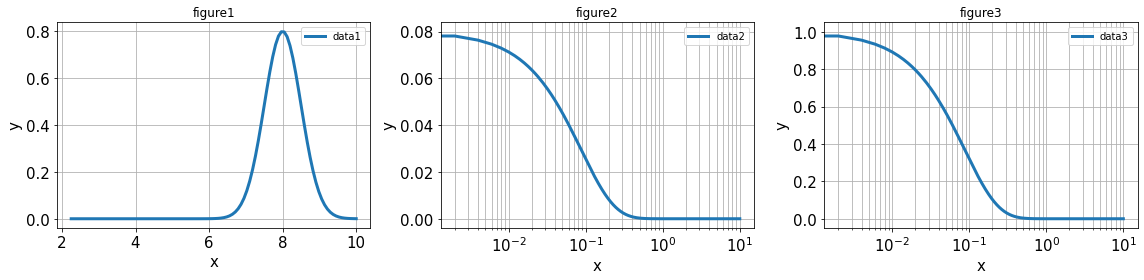

In [65]:
plot_triple_graphs(xdata1=r, ydata1=bimodal_distribution,
                   xdata2=time_array_dist, ydata2=signal_total_f, xscale2='log',
                   xdata3=time_array_dist, ydata3=normalize_results(signal_total_f), xscale3='log',
                   figsize=(16, 4),)

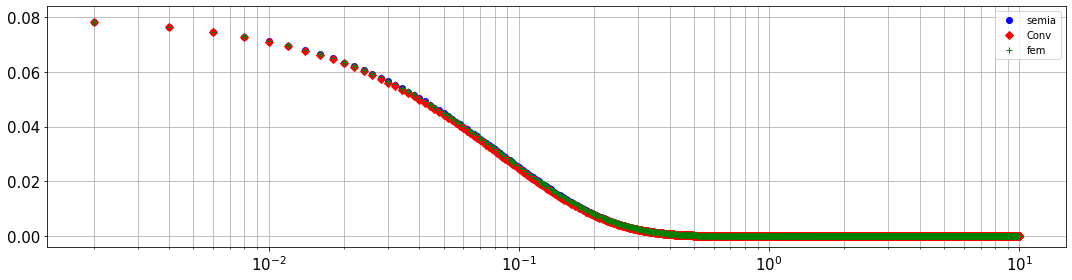

In [96]:
%matplotlib inline
plt.figure(figsize=(15, 4))
plt.plot(time_array_dist, signal_total_a, 'bo', label='semia')
plt.plot(time_array_dist, signal_total_c, 'rD', label='Conv')
plt.plot(time_array_dist, signal_total_f, 'g+', label='fem')
plt.grid(which='both')
plt.xscale('log')
plt.legend()

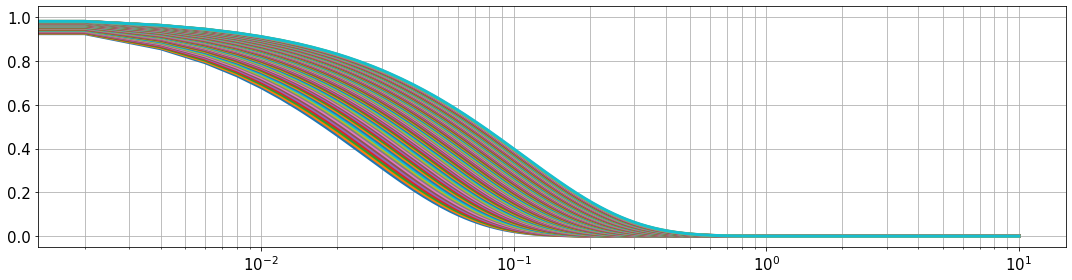

In [101]:
%matplotlib inline
plt.figure(figsize=(15, 4))
for i in range(np.shape(signal_radius)[0]):
    plt.plot(time_array_dist, normalize_results(signal_radius[i]), '-')

plt.grid(which='both')
plt.xscale('log')


# Simulation FEM

In [142]:
%%time

signal_total = np.zeros(nt)
signal_radius = []

for radius, prob in zip(r*1.e-6, bimodal_distribution):
    signal = prob * NMR_FEM(radius=radius, mesh_res=100,  
                            T2B=T2bulk, diffusion=diffusion_water, rho=surface_relaxivity, 
                            B_0=B0, Temp=temperature, fluid=fluid,
                            t_0=t0, t_f=tf, dt=dt, print_time=False,
                            volume_=False , return_data = 'mag_amounts')
    signal_radius.append(signal)
    signal_total += signal

Calling FFC just-in-time (JIT) compiler, this may take some time.
CPU times: user 33min 31s, sys: 53.6 s, total: 34min 24s
Wall time: 34min 29s


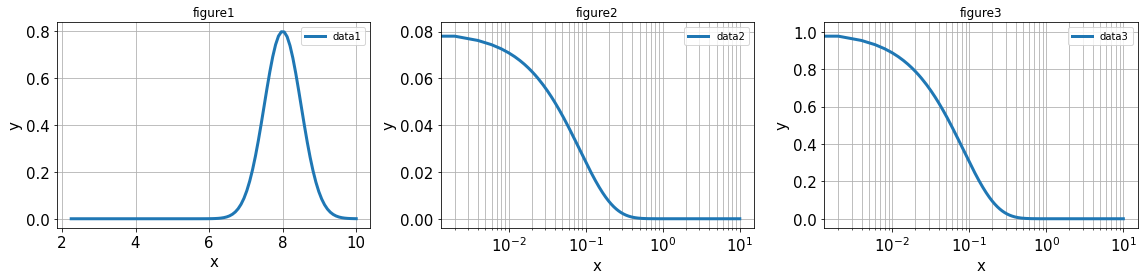

In [143]:
plot_triple_graphs(xdata1=r, ydata1=bimodal_distribution,
                   xdata2=time_array_dist, ydata2=signal_total, xscale2='log',
                   xdata3=time_array_dist, ydata3=normalize_results(signal_total), xscale3='log',
                   figsize=(16, 4),)

In [144]:
T2_fit_radius = []
for i in range(len(r)):
    T2_fit_radius.append(T2star_fit(time_array_dist, normalize_results(signal_radius[i])))
    #print(f'{r[i]:.4f} [um], {T2_fit_radius[i]:4f} [s]')

In [146]:
#np.savetxt('results/fid_fem_a0_rho30_d2p3_t2b1_tf10_dt0p002.txt', signal_total)
#np.savetxt('results/timearr_fem_a0_rho30_d2p3_t2b1_tf10_dt0p002.txt', time_array_dist)
#np.savetxt('results/fid_allradii_fem_a0_rho30_d2p3_t2b1_tf10_dt0p002.txt', signal_radius)
#np.savetxt('results/t2fit_allradii_fem_a0_rho30_d2p3_t2b1_tf10_dt0p002.txt', T2_fit_radius)

signal_total1 = np.loadtxt('results/fid_fem_a0_rho30_d2p3_t2b1_tf10_dt0p002.txt')
time_array_dist1 = np.loadtxt('results/timearr_fem_a0_rho30_d2p3_t2b1_tf10_dt0p002.txt')
signal_radius1 = np.loadtxt('results/fid_allradii_fem_a0_rho30_d2p3_t2b1_tf10_dt0p002.txt')
T2_fit_radius1 = np.loadtxt('results/t2fit_allradii_fem_a0_rho30_d2p3_t2b1_tf10_dt0p002.txt')
r1 = np.loadtxt('results/radii_dist_2p25to10um_mu3p5_8um_sigma0p5um_a0.0.txt')
pdf1 = np.loadtxt('results/pdf_dist_2p25to10um_mu3p5_8um_sigma0p5um_a0.0.txt')

#r_min, r_max = 2.5 , 10.
#params1 = (3.5, 0.5)
#params2 = (8., 0.5)
#a = 0.
#len(r) = 100

In [4]:
#np.savetxt('fid_semia_a0p2_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', signal_total)
#np.savetxt('timearr_semia_a0p2_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', time_array_dist)
#np.savetxt('fid_allradii_semia_a0p2_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', signal_radius)
#np.savetxt('t2fit_allradii_semia_a0p2_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', T2_fit_radius)
#np.savetxt('radii_dist_5to100um_mu25_75um_sigma5um_a0.2.txt', r)
#np.savetxt('pdf_dist_5to100um_mu25_75um_sigma5um_a0.2.txt', bimodal_distribution)

signal_total11 = np.loadtxt('fid_semia_a0p2_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
time_array_dist11 = np.loadtxt('timearr_semia_a0p2_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
signal_radius11 = np.loadtxt('fid_allradii_semia_a0p2_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
T2_fit_radius11 = np.loadtxt('t2fit_allradii_semia_a0p2_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
r11 = np.loadtxt('radii_dist_5to100um_mu25_75um_sigma5um_a0.2.txt')
pdf11 = np.loadtxt('pdf_dist_5to100um_mu25_75um_sigma5um_a0.2.txt')

#r_min, r_max = 5. , 100.
#params1 = (25., 5.)
#params2 = (75., 5.)
#a = 0.2
#len(r) = 100

In [5]:
#np.savetxt('fid_semia_a0p4_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', signal_total)
#np.savetxt('timearr_semia_a0p4_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', time_array_dist)
#np.savetxt('fid_allradii_semia_a0p4_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', signal_radius)
#np.savetxt('t2fit_allradii_semia_a0p4_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', T2_fit_radius)
#np.savetxt('radii_dist_5to100um_mu25_75um_sigma5um_a0.4.txt', r)
#np.savetxt('pdf_dist_5to100um_mu25_75um_sigma5um_a0.4.txt', bimodal_distribution)

signal_total111 = np.loadtxt('fid_semia_a0p4_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
time_array_dist111 = np.loadtxt('timearr_semia_a0p4_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
signal_radius111 = np.loadtxt('fid_allradii_semia_a0p4_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
T2_fit_radius111 = np.loadtxt('t2fit_allradii_semia_a0p4_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
r111 = np.loadtxt('radii_dist_5to100um_mu25_75um_sigma5um_a0.4.txt')
pdf111 = np.loadtxt('pdf_dist_5to100um_mu25_75um_sigma5um_a0.4.txt')

#r_min, r_max = 5. , 100.
#params1 = (25., 5.)
#params2 = (75., 5.)
#a = 0.4
#len(r) = 100

In [6]:
#np.savetxt('fid_semia_a0p6_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', signal_total)
#np.savetxt('timearr_semia_a0p6_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', time_array_dist)
#np.savetxt('fid_allradii_semia_a0p6_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', signal_radius)
#np.savetxt('t2fit_allradii_semia_a0p6_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', T2_fit_radius)
#np.savetxt('radii_dist_5to100um_mu25_75um_sigma5um_a0.6.txt', r)
#np.savetxt('pdf_dist_5to100um_mu25_75um_sigma5um_a0.6.txt', bimodal_distribution)

signal_total1111 = np.loadtxt('fid_semia_a0p6_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
time_array_dist1111 = np.loadtxt('timearr_semia_a0p6_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
signal_radius1111 = np.loadtxt('fid_allradii_semia_a0p6_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
T2_fit_radius1111 = np.loadtxt('t2fit_allradii_semia_a0p6_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
r1111 = np.loadtxt('radii_dist_5to100um_mu25_75um_sigma5um_a0.6.txt')
pdf1111 = np.loadtxt('pdf_dist_5to100um_mu25_75um_sigma5um_a0.6.txt')

#r_min, r_max = 5. , 100.
#params1 = (25., 5.)
#params2 = (75., 5.)
#a = 0.6
#len(r) = 100

In [7]:
#np.savetxt('fid_semia_a0p8_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', signal_total)
#np.savetxt('timearr_semia_a0p8_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', time_array_dist)
#np.savetxt('fid_allradii_semia_a0p8_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', signal_radius)
#np.savetxt('t2fit_allradii_semia_a0p8_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', T2_fit_radius)
#np.savetxt('radii_dist_5to100um_mu25_75um_sigma5um_a0.8.txt', r)
#np.savetxt('pdf_dist_5to100um_mu25_75um_sigma5um_a0.8.txt', bimodal_distribution)

signal_total11111 = np.loadtxt('fid_semia_a0p8_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
time_array_dist11111 = np.loadtxt('timearr_semia_a0p8_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
signal_radius11111 = np.loadtxt('fid_allradii_semia_a0p8_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
T2_fit_radius11111 = np.loadtxt('t2fit_allradii_semia_a0p8_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
r11111 = np.loadtxt('radii_dist_5to100um_mu25_75um_sigma5um_a0.8.txt')
pdf11111 = np.loadtxt('pdf_dist_5to100um_mu25_75um_sigma5um_a0.8.txt')

#r_min, r_max = 5. , 100.
#params1 = (25., 5.)
#params2 = (75., 5.)
#a = 0.8
#len(r) = 100

In [8]:
#np.savetxt('fid_semia_a1_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', signal_total)
#np.savetxt('timearr_semia_a1_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', time_array_dist)
#np.savetxt('fid_allradii_semia_a1_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', signal_radius)
#np.savetxt('t2fit_allradii_semia_a1_rho30_d2p3_t2b0p5_tf10_dt0p001.txt', T2_fit_radius)
#np.savetxt('radii_dist_5to100um_mu25_75um_sigma5um_a1.0.txt', r)
#np.savetxt('pdf_dist_5to100um_mu25_75um_sigma5um_a1.0.txt', bimodal_distribution)

signal_total111111 = np.loadtxt('fid_semia_a1_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
time_array_dist111111 = np.loadtxt('timearr_semia_a1_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
signal_radius111111 = np.loadtxt('fid_allradii_semia_a1_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
T2_fit_radius111111 = np.loadtxt('t2fit_allradii_semia_a1_rho30_d2p3_t2b0p5_tf10_dt0p001.txt')
r111111 = np.loadtxt('radii_dist_5to100um_mu25_75um_sigma5um_a1.0.txt')
pdf111111 = np.loadtxt('pdf_dist_5to100um_mu25_75um_sigma5um_a1.0.txt')

#r_min, r_max = 5. , 100.
#params1 = (25., 5.)
#params2 = (75., 5.)
#a = 1
#len(r) = 100

In [148]:
t2fit1 = T2star_fit(time_array_dist1, signal_total1)
#t2fit11 = T2star_fit(time_array_dist1, signal_total11)
#t2fit111 = T2star_fit(time_array_dist1, signal_total111)
#t2fit1111 = T2star_fit(time_array_dist1, signal_total1111)
#t2fit11111 = T2star_fit(time_array_dist1, signal_total11111)
#t2fit111111 = T2star_fit(time_array_dist1, signal_total111111)

print(t2fit1)
#print(t2fit11)
#print(t2fit111)
#print(t2fit1111)
#print(t2fit11111)
#print(t2fit111111)

0.08417957645032753


Text(0.5, 1.0, 'FID FEM, rho=30um/s, D=2300um2/s, T2b=1s, tf=10s, dt=0.001')

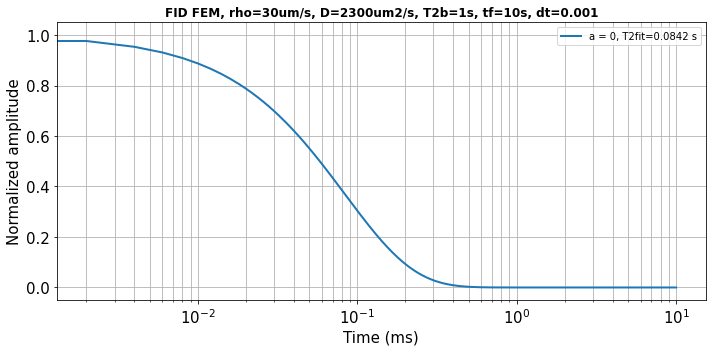

In [149]:
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.semilogx(time_array_dist1, normalize_results(signal_total1), label =f'a = 0, T2fit={t2fit1:.4f} s', linewidth=2)
#plt.semilogx(time_array_dist11, normalize_results(signal_total11), label = f'a = 0.2, T2fit={t2fit11:.4f} s', linewidth=2)
#plt.semilogx(time_array_dist111, normalize_results(signal_total111), label = f'a = 0.4, T2fit={t2fit111:.4f} s', linewidth=2)
#plt.semilogx(time_array_dist1111, normalize_results(signal_total1111), label = f'a = 0.6, T2fit={t2fit1111:.4f} s', linewidth=2)
#plt.semilogx(time_array_dist11111, normalize_results(signal_total11111), label = f'a = 0.8, T2fit={t2fit11111:.4f} s', linewidth=2)
#plt.semilogx(time_array_dist111111, normalize_results(signal_total111111), label = f'a = 1, T2fit={t2fit111111:.4f} s', linewidth=2)
plt.legend()
plt.grid(True, which='both')
plt.xlabel('Time (ms)')
plt.ylabel('Normalized amplitude')
plt.title('FID FEM, rho=30um/s, D=2300um2/s, T2b=1s, tf=10s, dt=0.001', fontweight='bold')
#plt.savefig('fid_semia_rho30_d2p3_t2b0p5_tf10_dt0p001')

In [150]:
def calculate_z0_zf(T2bulk, surface_relaxivity, r0, rf):
    if T2bulk != 0:
        z0 = (1/T2bulk) + ((3.*surface_relaxivity)/r0)
        zf = (1/T2bulk) + ((3.*surface_relaxivity)/rf)
    else:
        z0 = (3.*surface_relaxivity)/r0
        zf = (3.*surface_relaxivity)/rf
    return z0, zf

def calculate_phi_radii(T2bulk, surface_relaxivity, z, fz, m0):
    if T2bulk != 0:
        phi = (((z - (1/T2bulk))**2) * fz) / (3 * surface_relaxivity * m0)
        radii_ = (3 * surface_relaxivity) / (z - (1/T2bulk))
    else:
        phi = ((z**2) * fz) / (3 * surface_relaxivity * m0)
        radii_ = (3 * surface_relaxivity) / z
    return phi, radii_

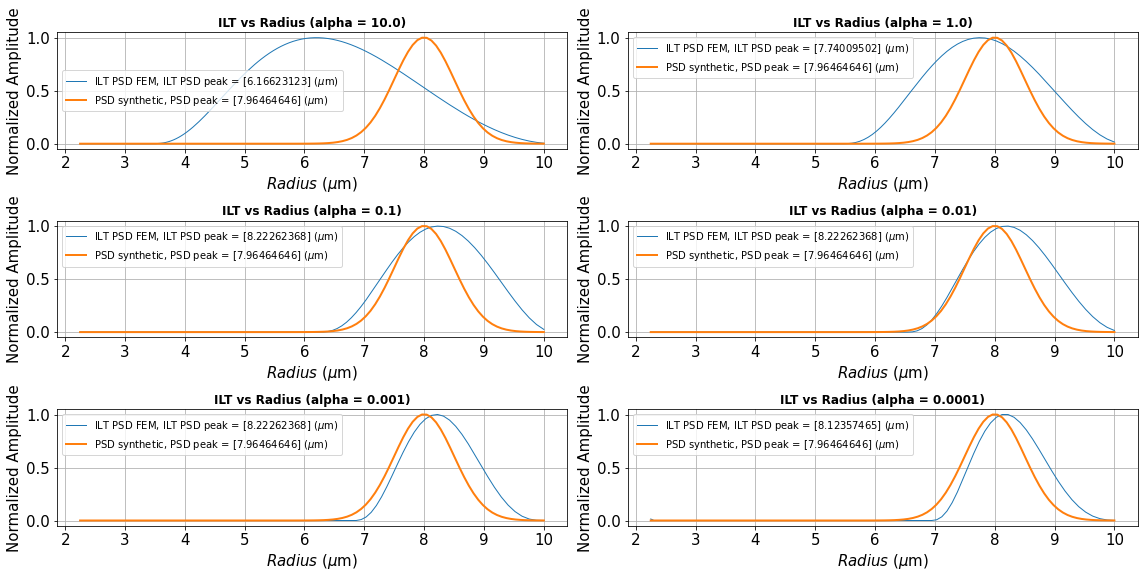

In [151]:
%matplotlib inline
alpha_values = np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4])

z_values = []
fz_values = []

fig, axs = plt.subplots(3, 2, figsize=(16, 8))

for i in range(3):
    for j in range(2):
        idx = i * 2 + j
        if idx < len(alpha_values):
            alpha = alpha_values[idx]
            r0, rf = np.min(r1)*1.e-6, np.max(r1)*1.e-6
            z0, zf = calculate_z0_zf(T2bulk=T2bulk, surface_relaxivity=surface_relaxivity, r0=r0, rf=rf)
            z, fz, _, _, _ = ilt(time_array_dist1, normalize_results(signal_total1), (zf, z0), 128, alpha)
            z_values.append(z)
            fz_values.append(fz)

            phi, radii_ = calculate_phi_radii(T2bulk=T2bulk, surface_relaxivity=surface_relaxivity, z=z, fz=fz, m0=mag_sat(B0, temperature, fluid))

            ilt_peak = maxT2_ilt(radii_*1.e6, phi)[1]
            psd_peak = maxT2_ilt(r1, pdf1)[1]

            axs[i, j].plot(radii_*1.e6, normalize_results(phi), label=f'ILT PSD FEM, ILT PSD peak = {ilt_peak} ($\mu$m)', linewidth=1)
            axs[i, j].plot(r1, normalize_results(pdf1), label=f'PSD synthetic, PSD peak = {psd_peak} ($\mu$m)', linewidth=2)
            
            axs[i, j].set_xscale('linear')
            axs[i, j].grid(True, which='both')
            axs[i, j].legend()
            axs[i, j].set_title(f'ILT vs Radius (alpha = {alpha})', fontweight='bold')
            axs[i, j].set_xlabel('$Radius$ ($\mu$m)')
            axs[i, j].set_ylabel('Normalized Amplitude')

plt.tight_layout()
#plt.savefig('ilt_semia_psd_a0_rho30_d2p3_t2b0p5_tf10_dt0p001.png')
plt.show()

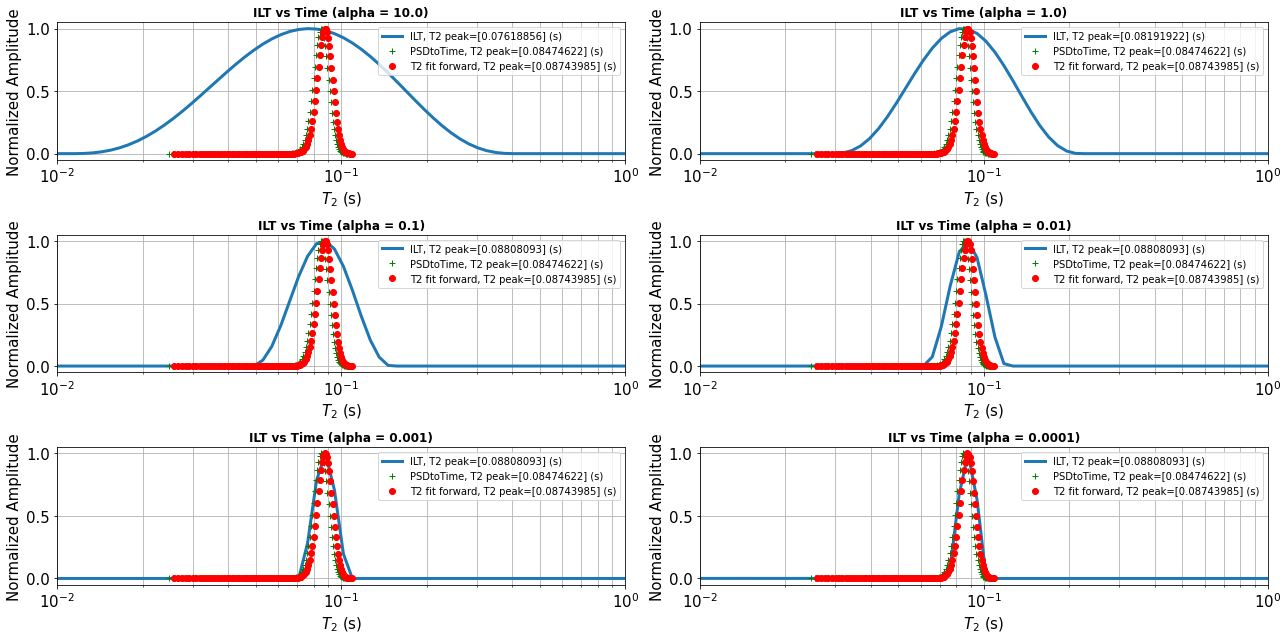

In [130]:
%matplotlib inline
alpha_values = np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4])

z_values1 = []
fz_values1 = []

fig, axs = plt.subplots(3, 2, figsize=(18, 9))

for i in range(3):
    for j in range(2):
        idx = i * 2 + j
        if idx < len(alpha_values):
            alpha = alpha_values[idx]
            z, fz, _, _, _ = ilt(time_array_dist1, signal_total1, (1.e-2, 1.e2), 128, alpha)
            z_values1.append(z)
            fz_values1.append(fz)
            
            T2_peak = maxT2_ilt(1/z, z*fz)[1]

            T2_peak_psd2time = maxT2_ilt((T2bulk*(r1*1.e-6))/((r1*1.e-6)+(surface_relaxivity*3*T2bulk)), pdf1)[1]
            T2_peak_forward = maxT2_ilt(T2_fit_radius1, pdf1)[1]
            
            axs[i, j].plot(1/z, normalize_results(z*fz), label=f'ILT, T2 peak={T2_peak} (s)')
            #axs[i, j].plot((r1*1.e-6)/(3*surface_relaxivity), normalize_results(pdf1), 'r--', label='PSD no T2B')
            axs[i, j].plot((T2bulk*(r1*1.e-6))/((r1*1.e-6)+(surface_relaxivity*3*T2bulk)), normalize_results(pdf1), 'g+', label=f'PSDtoTime, T2 peak={T2_peak_psd2time} (s)')
            axs[i, j].plot(T2_fit_radius1, normalize_results(pdf1), 'ro', label=f'T2 fit forward, T2 peak={T2_peak_forward} (s)')
            axs[i, j].set_xscale('log')
            axs[i, j].grid(True, which='both')
            axs[i, j].legend()
            axs[i, j].set_title(f'ILT vs Time (alpha = {alpha})', fontweight='bold')
            axs[i, j].set_xlim(1.e-2, 1.e0)
            axs[i, j].set_xlabel('$T_2$ (s)')
            axs[i, j].set_ylabel('Normalized Amplitude')

plt.tight_layout()
#plt.savefig('ilt1_semia_a0_rho30_d2p3_t2b0p5_tf10_dt0p001.png')
plt.show()

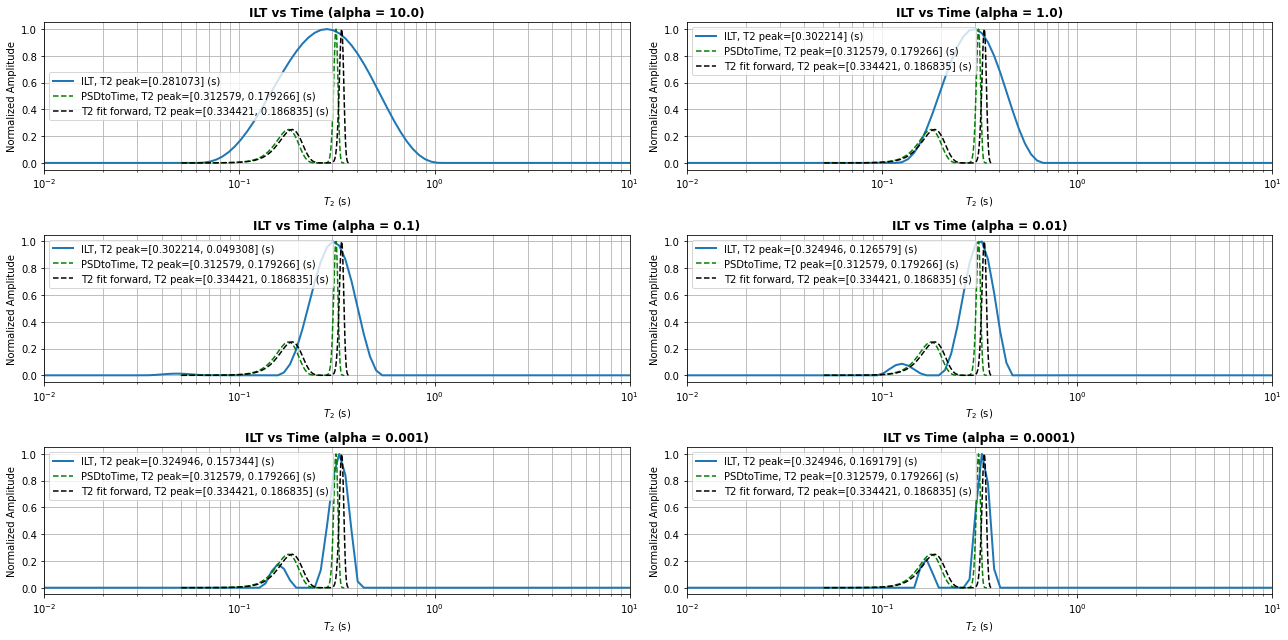

In [112]:
%matplotlib inline
alpha_values = np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4])

z_values11 = []
fz_values11 = []

fig, axs = plt.subplots(3, 2, figsize=(18, 9))

for i in range(3):
    for j in range(2):
        idx = i * 2 + j
        if idx < len(alpha_values):
            alpha = alpha_values[idx]
            z, fz, _, _ = ilt(time_array_dist11, signal_total11, (1.e-2, 1.e2), 128, alpha)
            z_values.append(z)
            fz_values.append(fz)
            
            T2_peak = maxT2_ilt(1/z, z*fz)[1]

            T2_peak_psd2time = maxT2_ilt((T2bulk*(r11*1.e-6))/((r11*1.e-6)+(surface_relaxivity*3*T2bulk)), pdf11)[1]
            T2_peak_forward = maxT2_ilt(T2_fit_radius11, pdf11)[1]
            
            axs[i, j].plot(1/z, normalize_results(z*fz), label=f'ILT, T2 peak={T2_peak} (s)', linewidth=2)
            #axs[i, j].plot((r1*1.e-6)/(3*surface_relaxivity), normalize_results(pdf1), 'r--', label='PSD no T2B')
            axs[i, j].plot((T2bulk*(r11*1.e-6))/((r11*1.e-6)+(surface_relaxivity*3*T2bulk)), normalize_results(pdf11), 'g--', label=f'PSDtoTime, T2 peak={T2_peak_psd2time} (s)')
            axs[i, j].plot(T2_fit_radius11, normalize_results(pdf11), 'k--', label=f'T2 fit forward, T2 peak={T2_peak_forward} (s)')
            axs[i, j].set_xscale('log')
            axs[i, j].grid(True, which='both')
            axs[i, j].legend()
            axs[i, j].set_title(f'ILT vs Time (alpha = {alpha})', fontweight='bold')
            axs[i, j].set_xlim(1.e-2, 1.e1)
            axs[i, j].set_xlabel('$T_2$ (s)')
            axs[i, j].set_ylabel('Normalized Amplitude')

plt.tight_layout()
plt.savefig('ilt11_semia_a0p2_rho30_d2p3_t2b0p5_tf10_dt0p001.png')
plt.show()

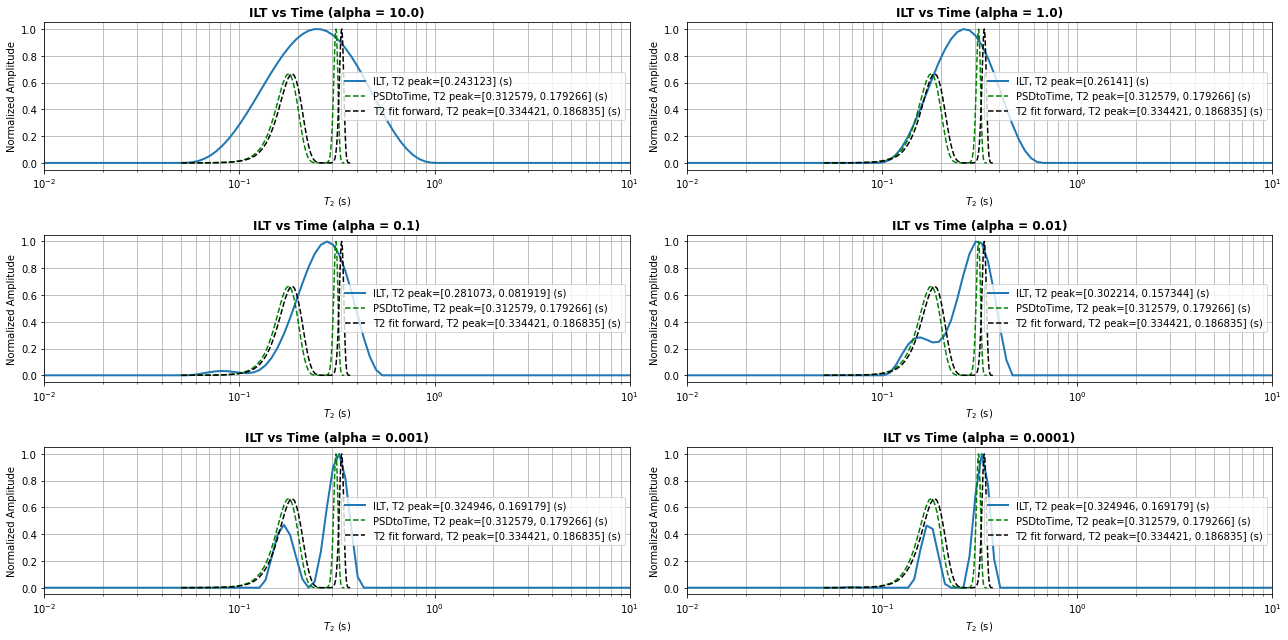

In [113]:
%matplotlib inline
alpha_values = np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4])

z_values111 = []
fz_values111 = []

fig, axs = plt.subplots(3, 2, figsize=(18, 9))

for i in range(3):
    for j in range(2):
        idx = i * 2 + j
        if idx < len(alpha_values):
            alpha = alpha_values[idx]
            z, fz, _, _ = ilt(time_array_dist111, signal_total111, (1.e-2, 1.e2), 128, alpha)
            z_values.append(z)
            fz_values.append(fz)
            
            T2_peak = maxT2_ilt(1/z, z*fz)[1]

            T2_peak_psd2time = maxT2_ilt((T2bulk*(r111*1.e-6))/((r111*1.e-6)+(surface_relaxivity*3*T2bulk)), pdf111)[1]
            T2_peak_forward = maxT2_ilt(T2_fit_radius111, pdf111)[1]
            
            axs[i, j].plot(1/z, normalize_results(z*fz), label=f'ILT, T2 peak={T2_peak} (s)', linewidth=2)
            #axs[i, j].plot((r1*1.e-6)/(3*surface_relaxivity), normalize_results(pdf1), 'r--', label='PSD no T2B')
            axs[i, j].plot((T2bulk*(r111*1.e-6))/((r111*1.e-6)+(surface_relaxivity*3*T2bulk)), normalize_results(pdf111), 'g--', label=f'PSDtoTime, T2 peak={T2_peak_psd2time} (s)')
            axs[i, j].plot(T2_fit_radius111, normalize_results(pdf111), 'k--', label=f'T2 fit forward, T2 peak={T2_peak_forward} (s)')
            axs[i, j].set_xscale('log')
            axs[i, j].grid(True, which='both')
            axs[i, j].legend()
            axs[i, j].set_title(f'ILT vs Time (alpha = {alpha})', fontweight='bold')
            axs[i, j].set_xlim(1.e-2, 1.e1)
            axs[i, j].set_xlabel('$T_2$ (s)')
            axs[i, j].set_ylabel('Normalized Amplitude')

plt.tight_layout()
plt.savefig('ilt111_semia_a0p4_rho30_d2p3_t2b0p5_tf10_dt0p001.png')
plt.show()

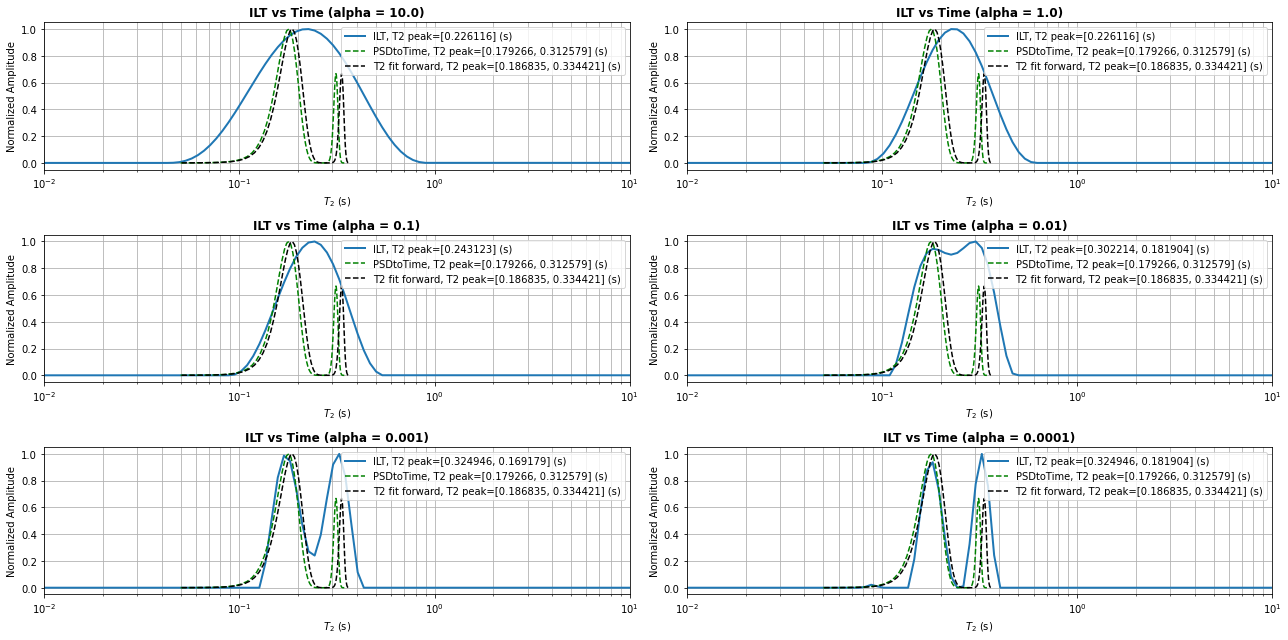

In [114]:
%matplotlib inline
alpha_values = np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4])

z_values1111 = []
fz_values1111 = []

fig, axs = plt.subplots(3, 2, figsize=(18, 9))

for i in range(3):
    for j in range(2):
        idx = i * 2 + j
        if idx < len(alpha_values):
            alpha = alpha_values[idx]
            z, fz, _, _ = ilt(time_array_dist1111, signal_total1111, (1.e-2, 1.e2), 128, alpha)
            z_values.append(z)
            fz_values.append(fz)
            
            T2_peak = maxT2_ilt(1/z, z*fz)[1]

            T2_peak_psd2time = maxT2_ilt((T2bulk*(r1111*1.e-6))/((r1111*1.e-6)+(surface_relaxivity*3*T2bulk)), pdf1111)[1]
            T2_peak_forward = maxT2_ilt(T2_fit_radius1111, pdf1111)[1]
            
            axs[i, j].plot(1/z, normalize_results(z*fz), label=f'ILT, T2 peak={T2_peak} (s)', linewidth=2)
            #axs[i, j].plot((r1*1.e-6)/(3*surface_relaxivity), normalize_results(pdf1), 'r--', label='PSD no T2B')
            axs[i, j].plot((T2bulk*(r1111*1.e-6))/((r1111*1.e-6)+(surface_relaxivity*3*T2bulk)), normalize_results(pdf1111), 'g--', label=f'PSDtoTime, T2 peak={T2_peak_psd2time} (s)')
            axs[i, j].plot(T2_fit_radius1111, normalize_results(pdf1111), 'k--', label=f'T2 fit forward, T2 peak={T2_peak_forward} (s)')
            axs[i, j].set_xscale('log')
            axs[i, j].grid(True, which='both')
            axs[i, j].legend()
            axs[i, j].set_title(f'ILT vs Time (alpha = {alpha})', fontweight='bold')
            axs[i, j].set_xlim(1.e-2, 1.e1)
            axs[i, j].set_xlabel('$T_2$ (s)')
            axs[i, j].set_ylabel('Normalized Amplitude')

plt.tight_layout()
plt.savefig('ilt1111_semia_a0p6_rho30_d2p3_t2b0p5_tf10_dt0p001.png')
plt.show()

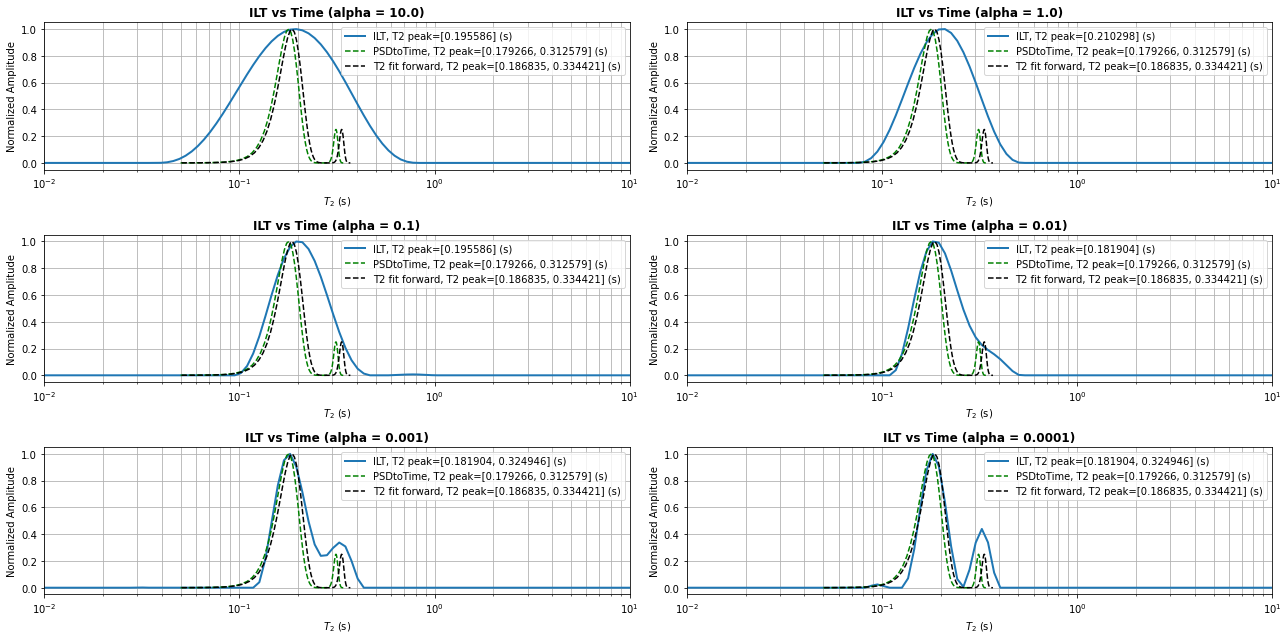

In [115]:
%matplotlib inline
alpha_values = np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4])

z_values11111 = []
fz_values11111 = []

fig, axs = plt.subplots(3, 2, figsize=(18, 9))

for i in range(3):
    for j in range(2):
        idx = i * 2 + j
        if idx < len(alpha_values):
            alpha = alpha_values[idx]
            z, fz, _, _ = ilt(time_array_dist11111, signal_total11111, (1.e-2, 1.e2), 128, alpha)
            z_values.append(z)
            fz_values.append(fz)
            
            T2_peak = maxT2_ilt(1/z, z*fz)[1]

            T2_peak_psd2time = maxT2_ilt((T2bulk*(r11111*1.e-6))/((r11111*1.e-6)+(surface_relaxivity*3*T2bulk)), pdf11111)[1]
            T2_peak_forward = maxT2_ilt(T2_fit_radius11111, pdf11111)[1]
            
            axs[i, j].plot(1/z, normalize_results(z*fz), label=f'ILT, T2 peak={T2_peak} (s)', linewidth=2)
            #axs[i, j].plot((r1*1.e-6)/(3*surface_relaxivity), normalize_results(pdf1), 'r--', label='PSD no T2B')
            axs[i, j].plot((T2bulk*(r11111*1.e-6))/((r11111*1.e-6)+(surface_relaxivity*3*T2bulk)), normalize_results(pdf11111), 'g--', label=f'PSDtoTime, T2 peak={T2_peak_psd2time} (s)')
            axs[i, j].plot(T2_fit_radius11111, normalize_results(pdf11111), 'k--', label=f'T2 fit forward, T2 peak={T2_peak_forward} (s)')
            axs[i, j].set_xscale('log')
            axs[i, j].grid(True, which='both')
            axs[i, j].legend()
            axs[i, j].set_title(f'ILT vs Time (alpha = {alpha})', fontweight='bold')
            axs[i, j].set_xlim(1.e-2, 1.e1)
            axs[i, j].set_xlabel('$T_2$ (s)')
            axs[i, j].set_ylabel('Normalized Amplitude')

plt.tight_layout()
plt.savefig('ilt11111_semia_a0p8_rho30_d2p3_t2b0p5_tf10_dt0p001.png')
plt.show()

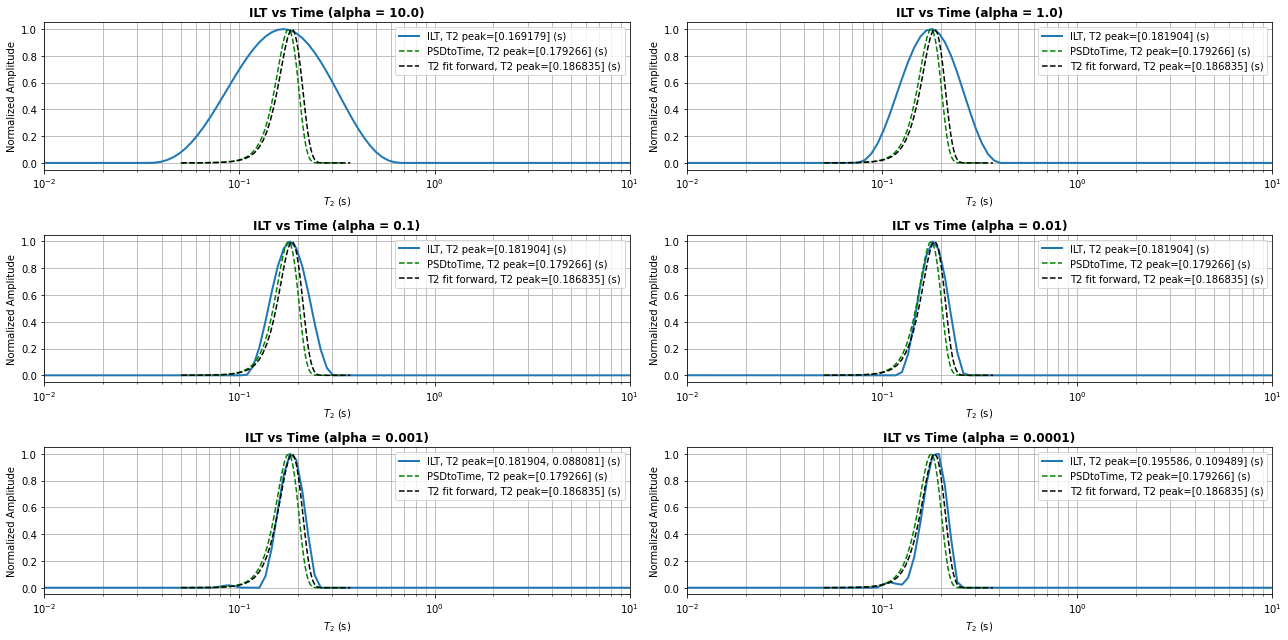

In [116]:
%matplotlib inline
alpha_values = np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4])

z_values111111 = []
fz_values111111 = []

fig, axs = plt.subplots(3, 2, figsize=(18, 9))

for i in range(3):
    for j in range(2):
        idx = i * 2 + j
        if idx < len(alpha_values):
            alpha = alpha_values[idx]
            z, fz, _, _ = ilt(time_array_dist111111, signal_total111111, (1.e-2, 1.e2), 128, alpha)
            z_values.append(z)
            fz_values.append(fz)
            
            T2_peak = maxT2_ilt(1/z, z*fz)[1]

            T2_peak_psd2time = maxT2_ilt((T2bulk*(r111111*1.e-6))/((r111111*1.e-6)+(surface_relaxivity*3*T2bulk)), pdf111111)[1]
            T2_peak_forward = maxT2_ilt(T2_fit_radius111111, pdf111111)[1]
            
            axs[i, j].plot(1/z, normalize_results(z*fz), label=f'ILT, T2 peak={T2_peak} (s)', linewidth=2)
            #axs[i, j].plot((r1*1.e-6)/(3*surface_relaxivity), normalize_results(pdf1), 'r--', label='PSD no T2B')
            axs[i, j].plot((T2bulk*(r111111*1.e-6))/((r111111*1.e-6)+(surface_relaxivity*3*T2bulk)), normalize_results(pdf111111), 'g--', label=f'PSDtoTime, T2 peak={T2_peak_psd2time} (s)')
            axs[i, j].plot(T2_fit_radius111111, normalize_results(pdf111111), 'k--', label=f'T2 fit forward, T2 peak={T2_peak_forward} (s)')
            axs[i, j].set_xscale('log')
            axs[i, j].grid(True, which='both')
            axs[i, j].legend()
            axs[i, j].set_title(f'ILT vs Time (alpha = {alpha})', fontweight='bold')
            axs[i, j].set_xlim(1.e-2, 1.e1)
            axs[i, j].set_xlabel('$T_2$ (s)')
            axs[i, j].set_ylabel('Normalized Amplitude')

plt.tight_layout()
plt.savefig('ilt111111_semia_a1_rho30_d2p3_t2b0p5_tf10_dt0p001.png')
plt.show()

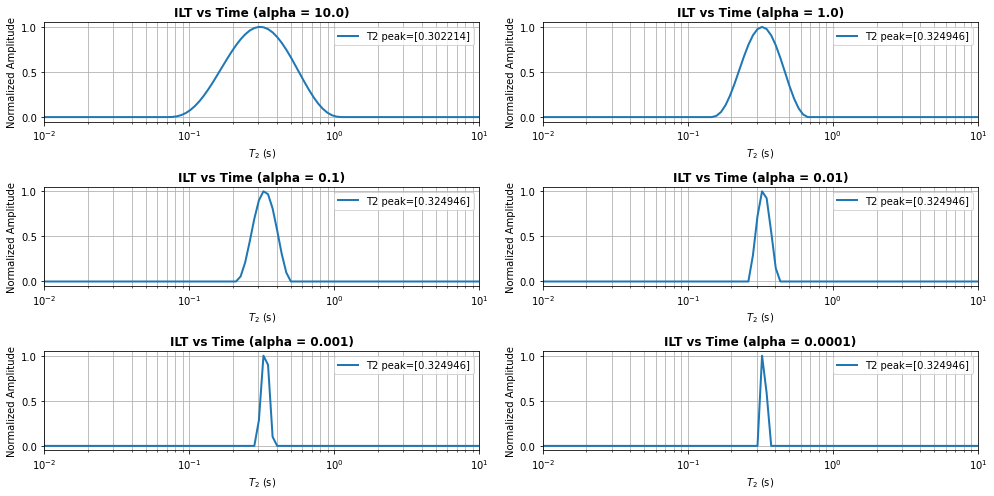

In [50]:
alpha_values = np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4])

z_values = []
fz_values = []

fig, axs = plt.subplots(3, 2, figsize=(14, 7))

for i in range(3):
    for j in range(2):
        idx = i * 2 + j
        if idx < len(alpha_values):
            alpha = alpha_values[idx]
            z, fz, _, _ = ilt(time_array_dist1, signal_total1, (1.e-2, 1.e2), 128, alpha)
            z_values.append(z)
            fz_values.append(fz)
            T2_peak = maxT2_ilt(1/z, z*fz)[1]
            
            axs[i, j].plot(1/z, normalize_results(z*fz), label=f'T2 peak={T2_peak}', linewidth=2)
            axs[i, j].set_xscale('log')
            axs[i, j].grid(True, which='both')
            axs[i, j].legend()
            axs[i, j].set_title(f'ILT vs Time (alpha = {alpha})', fontweight='bold')
            axs[i, j].set_xlim(1.e-2, 1.e1)
            axs[i, j].set_xlabel('$T_2$ (s)')
            axs[i, j].set_ylabel('Normalized Amplitude')

plt.tight_layout()
plt.savefig('ilt_semia_a0_rho30_d2p3_t2b0p5_tf10_dt0p001.png')
plt.show()

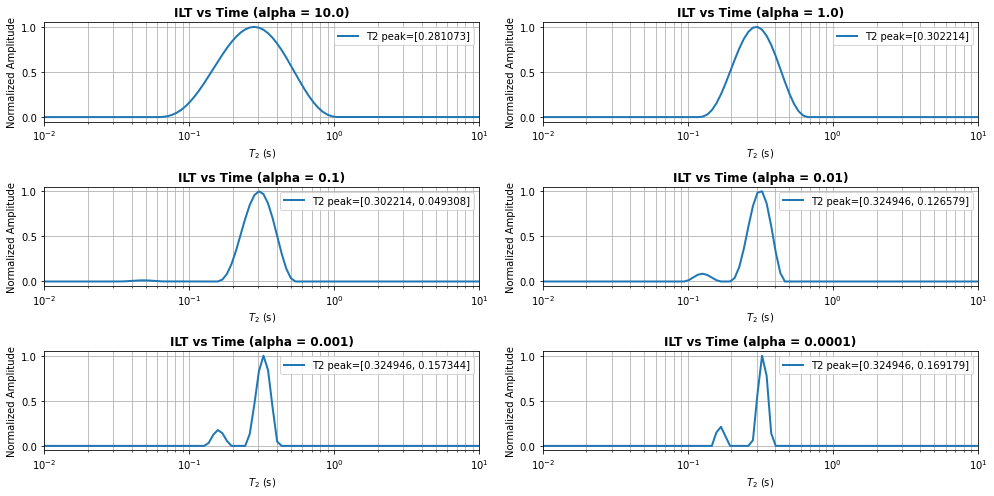

In [110]:
alpha_values = np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4])

fig, axs = plt.subplots(3, 2, figsize=(14, 7))

for i in range(3):
    for j in range(2):
        idx = i * 2 + j
        if idx < len(alpha_values):
            alpha = alpha_values[idx]
            z, fz, _, _ = ilt(time_array_dist11, signal_total11, (1.e-2, 1.e2), 128, alpha)
            
            T2_peak = maxT2_ilt(1/z, z*fz)[1]
            axs[i, j].plot(1/z, normalize_results(z*fz), label=f'T2 peak={T2_peak}', linewidth=2)
            axs[i, j].set_xscale('log')
            axs[i, j].grid(True, which='both')
            axs[i, j].legend()
            axs[i, j].set_title(f'ILT vs Time (alpha = {alpha})', fontweight='bold')
            axs[i, j].set_xlim(1.e-2, 1.e1)
            axs[i, j].set_xlabel('$T_2$ (s)')
            axs[i, j].set_ylabel('Normalized Amplitude')

plt.tight_layout()
plt.savefig('ilt_semia_a0p2_rho30_d2p3_t2b0p5_tf10_dt0p001.png')
plt.show()

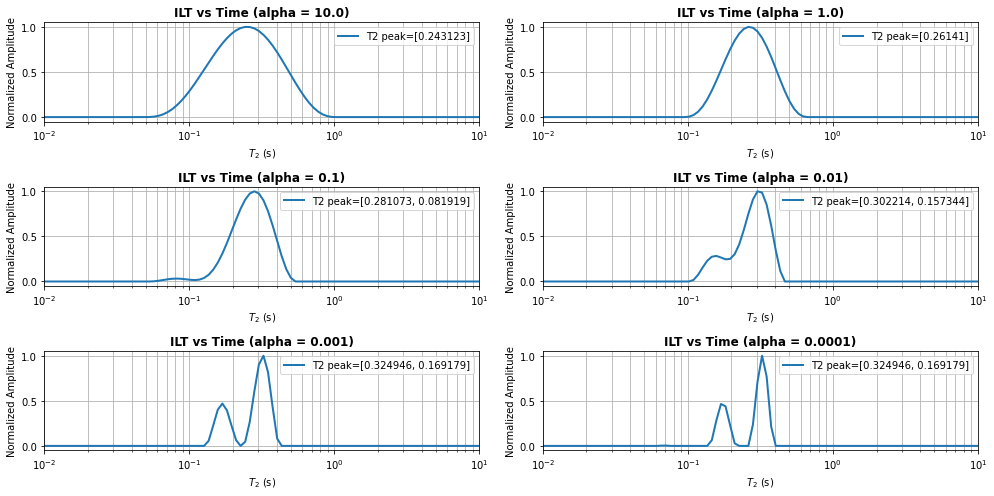

In [120]:
alpha_values = np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4])

fig, axs = plt.subplots(3, 2, figsize=(14, 7))

for i in range(3):
    for j in range(2):
        idx = i * 2 + j
        if idx < len(alpha_values):
            alpha = alpha_values[idx]
            z, fz, _, _ = ilt(time_array_dist111, signal_total111, (1.e-2, 1.e2), 128, alpha)
            
            T2_peak = maxT2_ilt(1/z, z*fz)[1]
            axs[i, j].plot(1/z, normalize_results(z*fz), label=f'T2 peak={T2_peak}', linewidth=2)
            axs[i, j].set_xscale('log')
            axs[i, j].grid(True, which='both')
            axs[i, j].legend()
            axs[i, j].set_title(f'ILT vs Time (alpha = {alpha})', fontweight='bold')
            axs[i, j].set_xlim(1.e-2, 1.e1)
            axs[i, j].set_xlabel('$T_2$ (s)')
            axs[i, j].set_ylabel('Normalized Amplitude')

plt.tight_layout()
plt.savefig('ilt_semia_a0p4_rho30_d2p3_t2b0p5_tf10_dt0p001.png')
plt.show()

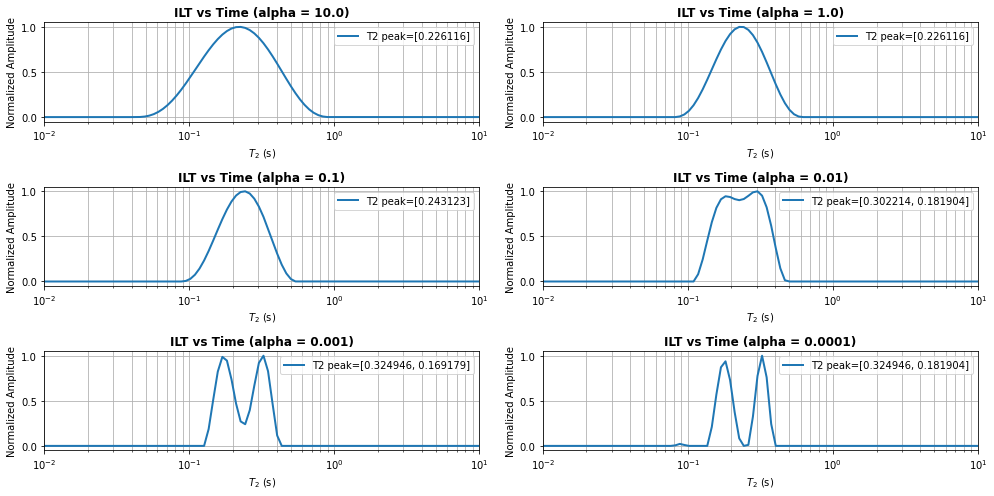

In [130]:
alpha_values = np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4])

fig, axs = plt.subplots(3, 2, figsize=(14, 7))

for i in range(3):
    for j in range(2):
        idx = i * 2 + j
        if idx < len(alpha_values):
            alpha = alpha_values[idx]
            z, fz, _, _ = ilt(time_array_dist1111, signal_total1111, (1.e-2, 1.e2), 128, alpha)
            
            T2_peak = maxT2_ilt(1/z, z*fz)[1]
            axs[i, j].plot(1/z, normalize_results(z*fz), label=f'T2 peak={T2_peak}', linewidth=2)
            axs[i, j].set_xscale('log')
            axs[i, j].grid(True, which='both')
            axs[i, j].legend()
            axs[i, j].set_title(f'ILT vs Time (alpha = {alpha})', fontweight='bold')
            axs[i, j].set_xlim(1.e-2, 1.e1)
            axs[i, j].set_xlabel('$T_2$ (s)')
            axs[i, j].set_ylabel('Normalized Amplitude')

plt.tight_layout()
plt.savefig('ilt_semia_a0p6_rho30_d2p3_t2b0p5_tf10_dt0p001.png')
plt.show()

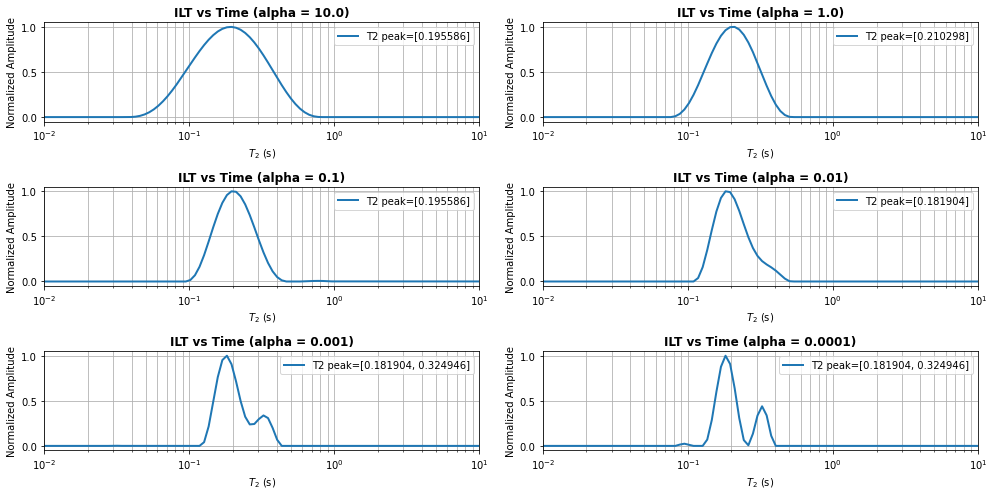

In [139]:
alpha_values = np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4])

fig, axs = plt.subplots(3, 2, figsize=(14, 7))

for i in range(3):
    for j in range(2):
        idx = i * 2 + j
        if idx < len(alpha_values):
            alpha = alpha_values[idx]
            z, fz, _, _ = ilt(time_array_dist11111, signal_total11111, (1.e-2, 1.e2), 128, alpha)
            
            T2_peak = maxT2_ilt(1/z, z*fz)[1]
            axs[i, j].plot(1/z, normalize_results(z*fz), label=f'T2 peak={T2_peak}', linewidth=2)
            axs[i, j].set_xscale('log')
            axs[i, j].grid(True, which='both')
            axs[i, j].legend()
            axs[i, j].set_title(f'ILT vs Time (alpha = {alpha})', fontweight='bold')
            axs[i, j].set_xlim(1.e-2, 1.e1)
            axs[i, j].set_xlabel('$T_2$ (s)')
            axs[i, j].set_ylabel('Normalized Amplitude')

plt.tight_layout()
plt.savefig('ilt_semia_a0p8_rho30_d2p3_t2b0p5_tf10_dt0p001.png')
plt.show()

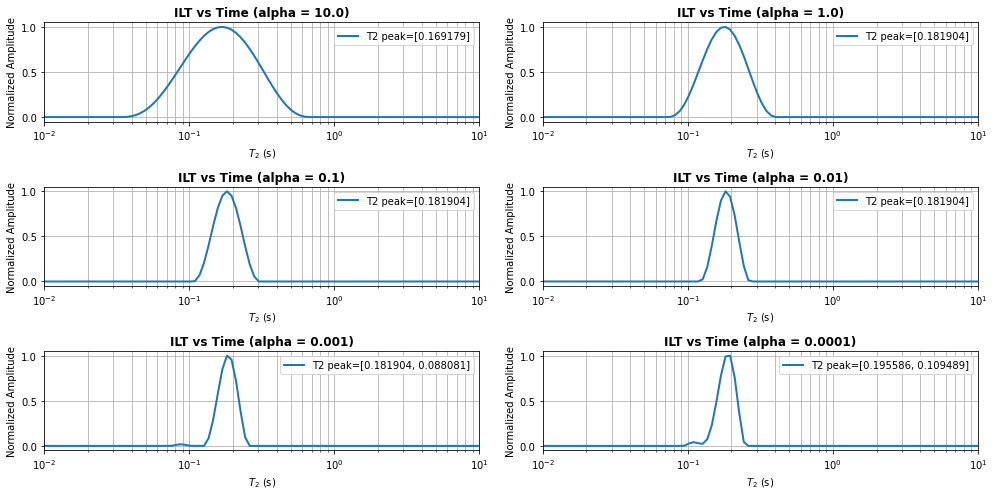

In [150]:
alpha_values = np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4])

fig, axs = plt.subplots(3, 2, figsize=(14, 7))

for i in range(3):
    for j in range(2):
        idx = i * 2 + j
        if idx < len(alpha_values):
            alpha = alpha_values[idx]
            z, fz, _, _ = ilt(time_array_dist111111, signal_total111111, (1.e-2, 1.e2), 128, alpha)
            
            T2_peak = maxT2_ilt(1/z, z*fz)[1]
            axs[i, j].plot(1/z, normalize_results(z*fz), label=f'T2 peak={T2_peak}', linewidth=2)
            axs[i, j].set_xscale('log')
            axs[i, j].grid(True, which='both')
            axs[i, j].legend()
            axs[i, j].set_title(f'ILT vs Time (alpha = {alpha})', fontweight='bold')
            axs[i, j].set_xlim(1.e-2, 1.e1)
            axs[i, j].set_xlabel('$T_2$ (s)')
            axs[i, j].set_ylabel('Normalized Amplitude')

plt.tight_layout()
plt.savefig('ilt_semia_a1_rho30_d2p3_t2b0p5_tf10_dt0p001.png')
plt.show()

0.302214
0.324946
0.324946
0.324946
0.324946
0.324946


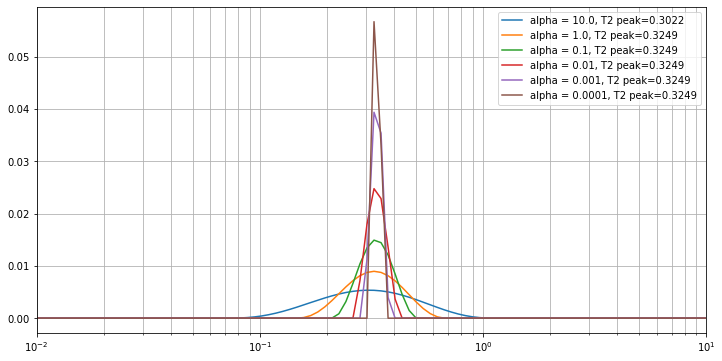

In [76]:
plt.figure(figsize=(12, 6))
for i in np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4]):
    z, fz, _, _ = ilt(time_array_dist1, signal_total1, (1.e-2, 1.e2), 128, i)

    print(maxT2_ilt1(1/z, z*fz)[1])

    plt.plot(1/z, z*fz, label=f'alpha = {i}, T2 peak={maxT2_ilt1(1/z, z*fz)[1]:.4f}')
    plt.xscale('log')
    plt.grid(True, which='both')
    plt.legend()
    plt.xlim(1.e-2, 1.e1)

0.281073
0.302214
0.302214
0.324946
0.324946
0.324946


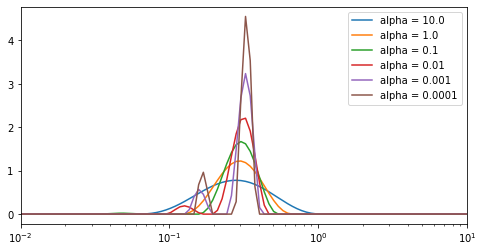

In [77]:
plt.figure(figsize=(8, 4))
for i in np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4]):
    z, fz, _, _ = ilt(time_array_dist11, normalize_results(signal_total11), (1.e-2, 1.e2), 128, i)

    print(maxT2_ilt1(1/z, z*fz)[1])

    plt.plot(1/z, z*fz, label=f'alpha = {i}')
    plt.xscale('log')
    plt.legend()
    plt.xlim(1.e-2, 1.e1)

0.302214
0.324946
0.324946
0.324946
0.324946
0.324946


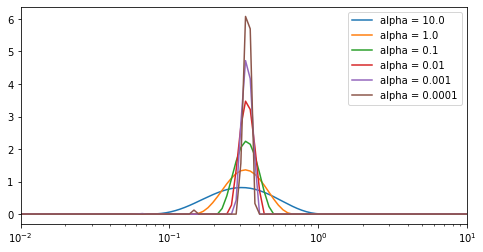

In [33]:
plt.figure(figsize=(8, 4))
for i in np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4]):
    z, fz, _, _ = ilt(time_array_dist111, normalize_results(signal_total111), (1.e-2, 1.e2), 128, i)

    print(maxT2_ilt1(1/z, z*fz)[1])

    plt.plot(1/z, z*fz, label=f'alpha = {i}')
    plt.xscale('log')
    plt.legend()
    plt.xlim(1.e-2, 1.e1)

0.226116
0.226116
0.243123
0.302214
0.324946
0.324946


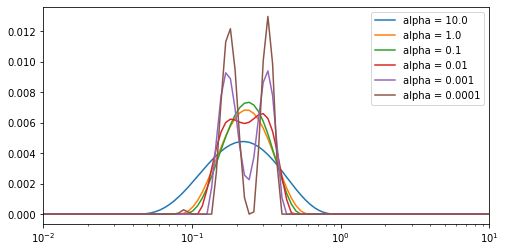

In [166]:
plt.figure(figsize=(8, 4))
for i in np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4]):
    z, fz, _, _ = ilt(time_array_dist1111, signal_total1111, (1.e-2, 1.e2), 128, i)

    print(maxT2_ilt1(1/z, z*fz)[1])

    plt.plot(1/z, z*fz, label=f'alpha = {i}')
    plt.xscale('log')
    plt.legend()
    plt.xlim(1.e-2, 1.e1)

0.195586
0.210298
0.195586
0.181904
0.181904
0.181904


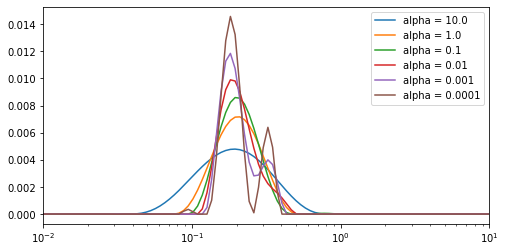

In [167]:
plt.figure(figsize=(8, 4))
for i in np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4]):
    z, fz, _, _ = ilt(time_array_dist11111, signal_total11111, (1.e-2, 1.e2), 128, i)

    print(maxT2_ilt1(1/z, z*fz)[1])

    plt.plot(1/z, z*fz, label=f'alpha = {i}')
    plt.xscale('log')
    plt.legend()
    plt.xlim(1.e-2, 1.e1)

0.169179
0.181904
0.181904
0.181904
0.181904
0.195586


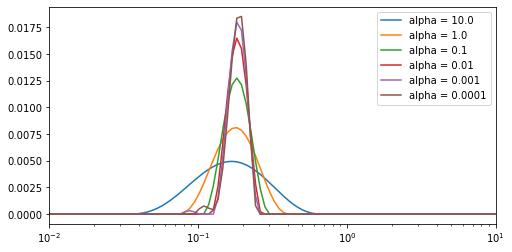

In [84]:
plt.figure(figsize=(8, 4))
for i in np.array([1.e1, 1.e0, 1.e-1, 1.e-2, 1.e-3, 1.e-4]):
    z, fz, _, _ = ilt(time_array_dist111111, signal_total111111, (1.e-2, 1.e2), 128, i)

    print(maxT2_ilt1(1/z, z*fz)[1])

    plt.plot(1/z, z*fz, label=f'alpha = {i}')
    plt.xscale('log')
    plt.legend()
    plt.xlim(1.e-2, 1.e1)